# 🔁 Ayudantía 02: Graficando coordenadas polares

## Pablo Zurita Soler (pzurita@uc.cl)

En esta ayudantía veremos cómo graficar coordenadas polares (o equivalentemente, secciones de coordenadas cilíndricas) usando `matplotlib`.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Primero, debemos generar una grilla en el espacio polar.

In [12]:
R = np.linspace(5, 10, 10)
T = np.linspace(0, 2*np.pi, 12)
RR, TT = np.meshgrid(R, T)

¿Qué pasa si tratamos de graficar esto?

(4.75, 10.25, -0.3141592653589793, 6.5973445725385655)

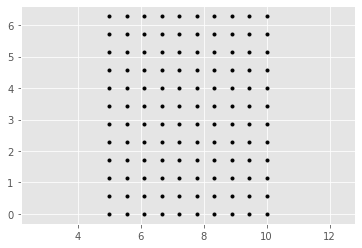

In [13]:
plt.figure()
plt.plot(RR, TT, '.', color='black')
plt.axis('equal')

Estamos graficando en el espacio polar, no vemos nada circular 😭. Por suerte, como `numpy` opera sobre arreglos elemento a elemento, podemos hacer lo siguiente...

(-10.574676222952224,
 10.97974648680725,
 -10.888035860690259,
 10.88803586069026)

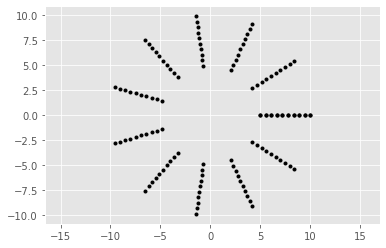

In [14]:
XX = RR*np.cos(TT)
YY = RR*np.sin(TT)

plt.figure()
plt.plot(XX, YY, '.', color='black')
plt.axis('equal')

Al operar elemento a elemento sobre los arreglos de coordenadas polares, efectivamente estamos transformando las coordenadas de los arreglos a cartesianas 🤯. Así podemos visualizar los mismos puntos, pero en un espacio coordenado cartesiano (donde cobra sentido nuestra grilla).

¿Qué pasa si yo quiero graficar varios _sets_ de puntos distintos?

In [15]:
def phi(R, T):
    r = R**2/8
    t = T/10
    return r, t

rr, tt = phi(RR,TT)

xx = rr*np.cos(tt)
yy = rr*np.sin(tt)

(-10.699676222952224,
 13.60474648680725,
 -10.888035860690259,
 10.88803586069026)

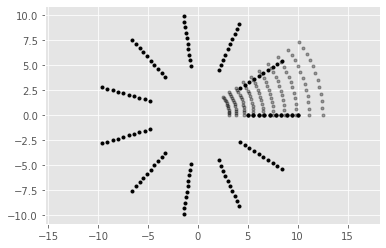

In [16]:
plt.figure()
plt.plot(XX, YY, '.', color='black', alpha=1)
plt.plot(xx, yy, '.', color='black', alpha=1/3)
plt.axis('equal')

Puedo aplicar funciones sobre los arreglos para modificarlos, y graficarlos en una misma figura (teniendo ojo de que se distingan).

Por último, ¿qué pasa si yo quiero graficar _campos_ sobre esta grilla?

Primero, necesito un arreglo **con la misma cantidad de puntos** que la grilla para guardar los valores del campo en cada punto. Por ejemplo, $f_{ij} = f(x_{ij})$.

Notarán que además nos gustaría que el arreglo tenga **la misma forma de la grilla** para poder indexarlo de manera natural. Podríamos tener $f_{i}$ y que sea más largo (por ejemplo, de largo $N^2$ si la grilla fuera de $N\times N$), pero en este momento eso no es necesario.

In [17]:
E_rr = np.zeros(RR.shape)

Esto solo sirve para **campos escalares**, pues para cada punto de la grilla tenemos _una_ entrada para guardar un valor asociado ($f : \Omega \to \mathbb{R}$ o $f : \Omega \to \mathbb{C}$). Si queremos guardar una representación de un **campo tensorial**, necesitamos _un (sub)arreglo asociado a cada punto_.

In [18]:
F = np.zeros((*RR.shape, 2, 2))
F.shape

(12, 10, 2, 2)

Luego podemos recorrer la grilla para asignar valores. En un problema complicado, normalmente habrían otras maneras de hacer esto, pues el recorrer la grilla uno a uno nos restringe a grillas no muy grandes. Dentro del recorrido uno puede realizar cuantas operaciones quiera: **esto es muy conveniente**.

In [19]:
for i in range(len(RR[:, 0])):
    for j in range(len(RR[0, :])):
        local_F = np.array([
            [RR[i, j]/4, 0],
            [0, 1/10]
        ])
        F[i, j] = local_F
        
        Q = np.array([
            [np.cos(TT[i, j]), -np.sin(TT[i, j])],
            [np.sin(TT[i, j]), np.cos(TT[i, j])]
        ])      
        
        local_E = 1/2*(np.transpose(local_F) @ local_F - np.identity(len(local_F)))
        E_rr[i, j] = local_E[0, 0]
        
        local_other_E = Q @ local_E @ np.transpose(Q)

A ver cómo quedó...

(-9.594929736144975, 10.0, -9.898214418809326, 9.898214418809328)

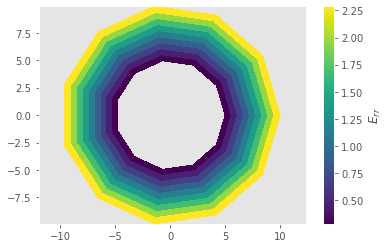

In [20]:
plt.figure()
plt.pcolor(XX, YY, E_rr)
plt.colorbar(label = r'$E_{rr}$')
plt.axis('equal')

¡Voilà! 🎉 Así podemos graficar campos sobre coordenadas polares usando solo `numpy` y `matplotlib`.